## <center> Name: Mikre Getu Mihrete <center/>
## <center> Email:- mikregetuinfo@gmail.com  <center/>

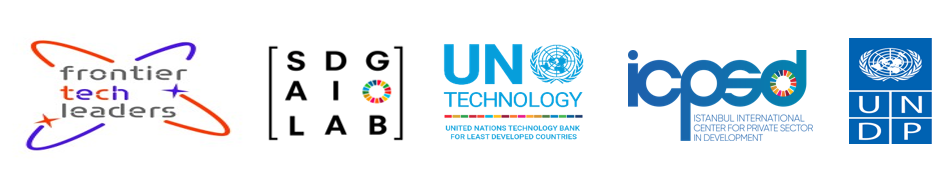

# Natural Language Processing (NLP) Assignment
This assignment will guide you through the basic concepts of Natural Language Processing including:
- Text preprocessing
- Tokenization and N-grams
- Named Entity Recognition (NER)
- Converting text into numbers (vectorization)
- Word embeddings (for experienced learners)

You can run and modify the code cells below to complete the tasks.

In [ ]:
#installing necessary libraries

#!pip install spacy
#python -m spacy download en_core_web_sm
#pip install numpy==1.26.0

In [5]:
# Import required libraries
import nltk
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import pandas as pd

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DBU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DBU\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\DBU\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\DBU\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DBU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


spaCy model loaded successfully!


## 1. Text Preprocessing
Clean the following text by converting it to lowercase, removing punctuation and stop words.

In [6]:
# Sample text
text = "Natural Language Processing is a fascinating field. It combines linguistics and computer science!"

# TODO: Preprocess the text
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove punctuation and stopwords
    cleaned_tokens = [token for token in tokens if token.isalnum() and token not in stopwords.words('english')]
    
    return cleaned_tokens

# Print cleaned tokens
cleaned_tokens = preprocess(text)
print("Cleaned Tokens:", cleaned_tokens)


Cleaned Tokens: ['natural', 'language', 'processing', 'fascinating', 'field', 'combines', 'linguistics', 'computer', 'science']


## 2. Tokenization and N-grams
Generate bigrams (2-grams) from the cleaned tokens.

In [7]:
# Generate bigrams from cleaned tokens
bigrams = list(ngrams(cleaned_tokens, 2))
print("Bigrams:", bigrams)

Bigrams: [('natural', 'language'), ('language', 'processing'), ('processing', 'fascinating'), ('fascinating', 'field'), ('field', 'combines'), ('combines', 'linguistics'), ('linguistics', 'computer'), ('computer', 'science')]


## 3. Named Entity Recognition (NER)
Use spaCy to perform NER on a new sentence.

In [8]:
# Example sentence
sentence = "Barack Obama was born in Hawaii and was elected president in 2008."
doc = nlp(sentence)

# Print named entities
for ent in doc.ents:
    print(ent.text, ent.label_)


Barack Obama PERSON
Hawaii GPE
2008 DATE


## 4. Converting Text to Numbers
Use CountVectorizer and TfidfVectorizer to convert a list of sentences into numeric vectors.

In [9]:
sentences = [
    "I love machine learning.",
    "Natural language processing is a part of AI.",
    "AI is the future."
]

# CountVectorizer
count_vec = CountVectorizer()
X_count = count_vec.fit_transform(sentences)
print("Count Vectorizer Output:\n", X_count.toarray())

# TfidfVectorizer
tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform(sentences)
print("\nTF-IDF Vectorizer Output:\n", X_tfidf.toarray())


Count Vectorizer Output:
 [[0 0 0 0 1 1 1 0 0 0 0 0]
 [1 0 1 1 0 0 0 1 1 1 1 0]
 [1 1 1 0 0 0 0 0 0 0 0 1]]

TF-IDF Vectorizer Output:
 [[0.         0.         0.         0.         0.57735027 0.57735027
  0.57735027 0.         0.         0.         0.         0.        ]
 [0.30650422 0.         0.30650422 0.40301621 0.         0.
  0.         0.40301621 0.40301621 0.40301621 0.40301621 0.        ]
 [0.42804604 0.5628291  0.42804604 0.         0.         0.
  0.         0.         0.         0.         0.         0.5628291 ]]


## 5. Word Embeddings (Advanced)
Use spaCy to get word vectors (embeddings) for given words.

In [12]:
# Note: en_core_web_sm does not have word vectors. You can install and use en_core_web_md
# Uncomment below to install and load the medium model if needed.
# !python -m spacy download en_core_web_md
# nlp = spacy.load("en_core_web_md")

# Example word vector
word = nlp("machine")[0]
print("Vector for 'machine':\n", word.vector)


Vector for 'machine':
 [-0.7506131  -0.57648134  0.64351434  0.34771815  0.45008683 -0.31984502
  1.3374304   0.6823808  -0.2497879   0.01502723  0.20069116 -0.53005815
 -0.32142693  0.6083895   0.5911227   1.3969526  -1.3394687  -0.49667895
  0.93146133  0.76211375 -0.63203835  1.1820786  -0.8377956   0.02632815
 -0.2938518   0.6069318   1.5544686  -0.04658484 -0.4521918   0.48126173
  0.02117339  0.9538507   0.38607836  0.03060612 -1.2614324  -0.71200204
 -0.0582068   0.9979756   0.39407492  0.03983042 -0.9099759  -0.30680424
  0.81676024  0.40132928 -0.6591901  -0.52833277 -0.1020698  -0.39648485
 -0.2746659  -0.5868281   0.11670423 -0.02715784  0.10342616 -0.71523666
  0.78196347  0.26182324  1.2007883   0.40819865 -0.81201667  0.10142356
 -0.92464274 -0.0610747  -0.28506368 -0.27212036 -0.06658131  0.21739644
 -0.34570417 -0.7191127  -0.6493219  -0.07578599 -0.26895642  0.25262332
  0.8506174   0.5730195  -0.10925089 -0.48964912 -0.33062595 -0.6904906
  0.58739054  0.52517235 -0.4